## Week 9: Lesson and Homework
<hr style="height: 3.0px"/>

> edited 10/2021 to use lmfit rather than curve_fit  
> updated 11/3/2021

**Part 3**:  `lmfit`  (week 8)  
    a. Application:  Creep Analysis of an S590 superalloy Fe-Co-Cr-Ni  
    b. Creating Larsen-Miller Plot from Creep Data (stress vs rupture time) at various temperatures  
    c. Interesting problem because instead of a typical fitting problem, here we are manipulating the set of temperature data curves with a fitting parameter that when found will collapse all the curves to one master curve (the Larsen-Miller plot).  

I'm going to look at some data from your Callister textbook and verify that the fitting parameter given in the text is correct.  

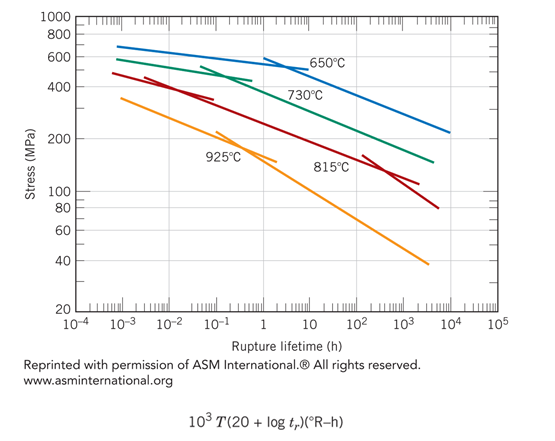  

According to the Callister textbook when you take the data in the above figure and replot as $(Log(\sigma)$ vs T (C + $Log(t_r)$) where $\sigma$ is in MPa, T is in Kelvin, $t_r$ is in hours and C is a fitting parameter which according to your textbook is 20. Here is what it looks like in your text: (Note that the x-axis in the figure below has been divided by 1000 i.e. the point 24 is really 24000.  

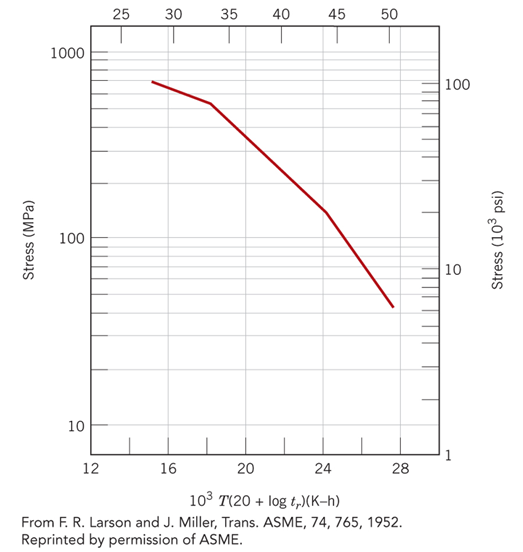  

  

First thing we need to do is select the data from the curves in our original figure.  

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
# import sympy as sym
# from sympy import solve
#from pathlib import Path


# pixel data stored in variable "pixel_positions"
def selectdata(image_file):
    %matplotlib notebook
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(9, 7))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    #ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib
    # .add_axes([left, bottom, width, height])
#     image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=-1, anchor=(0.5,1)) #zorder places figure on top of anything else in axes
#     image_axis.imshow(img)
#     image_axis.axis('off')
    #ax1.imshow(img, zorder=1)
    #ax1.axis('off')
    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position', fontsize='8')
    ax1.set_ylabel('y-pixel position', fontsize='8')
    plt.tick_params(labelsize = 6)
    #ax1.set_xlim([0,img.shape[1]])
    #ax1.set_ylim([0,img.shape[0]])
    ax1.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]], zorder=1)
    #ax1.axis('off')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(0.5)

    
    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,event.ydata])
            ax1.set_title(f'Click on data you want to collect below \nLast click: [{event.xdata:.3f}, {event.ydata:.3f}]')
            #ax2.scatter(event.xdata, ydim-event.ydata, marker='o', c='r', edgecolor='k') #adding scatter plot
            ax1.scatter(event.xdata, event.ydata, edgecolor='r', c='k', zorder=2, s=7)
#             circle = Circle((event.xdata, event.ydata), radius=0.01, clip_on=False, zorder=10, linewidth=1,
#                     edgecolor='black', facecolor=(0, 0, 0, .0125),
#                     path_effects=[withStroke(linewidth=5, foreground='w')])
#             ax1.add_artist(circle)
            #ax1.scatter(event.xdata, event.ydata, marker='.', c='c', edgecolor='k') #adding scatter plot
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()

# ****** changed this to take a list of three points for pixels and one for the corresponding plot calibration pts *********    
def cal(pixpts, plotpts, datatoconvert):    
    
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

<IPython.core.display.Javascript object>


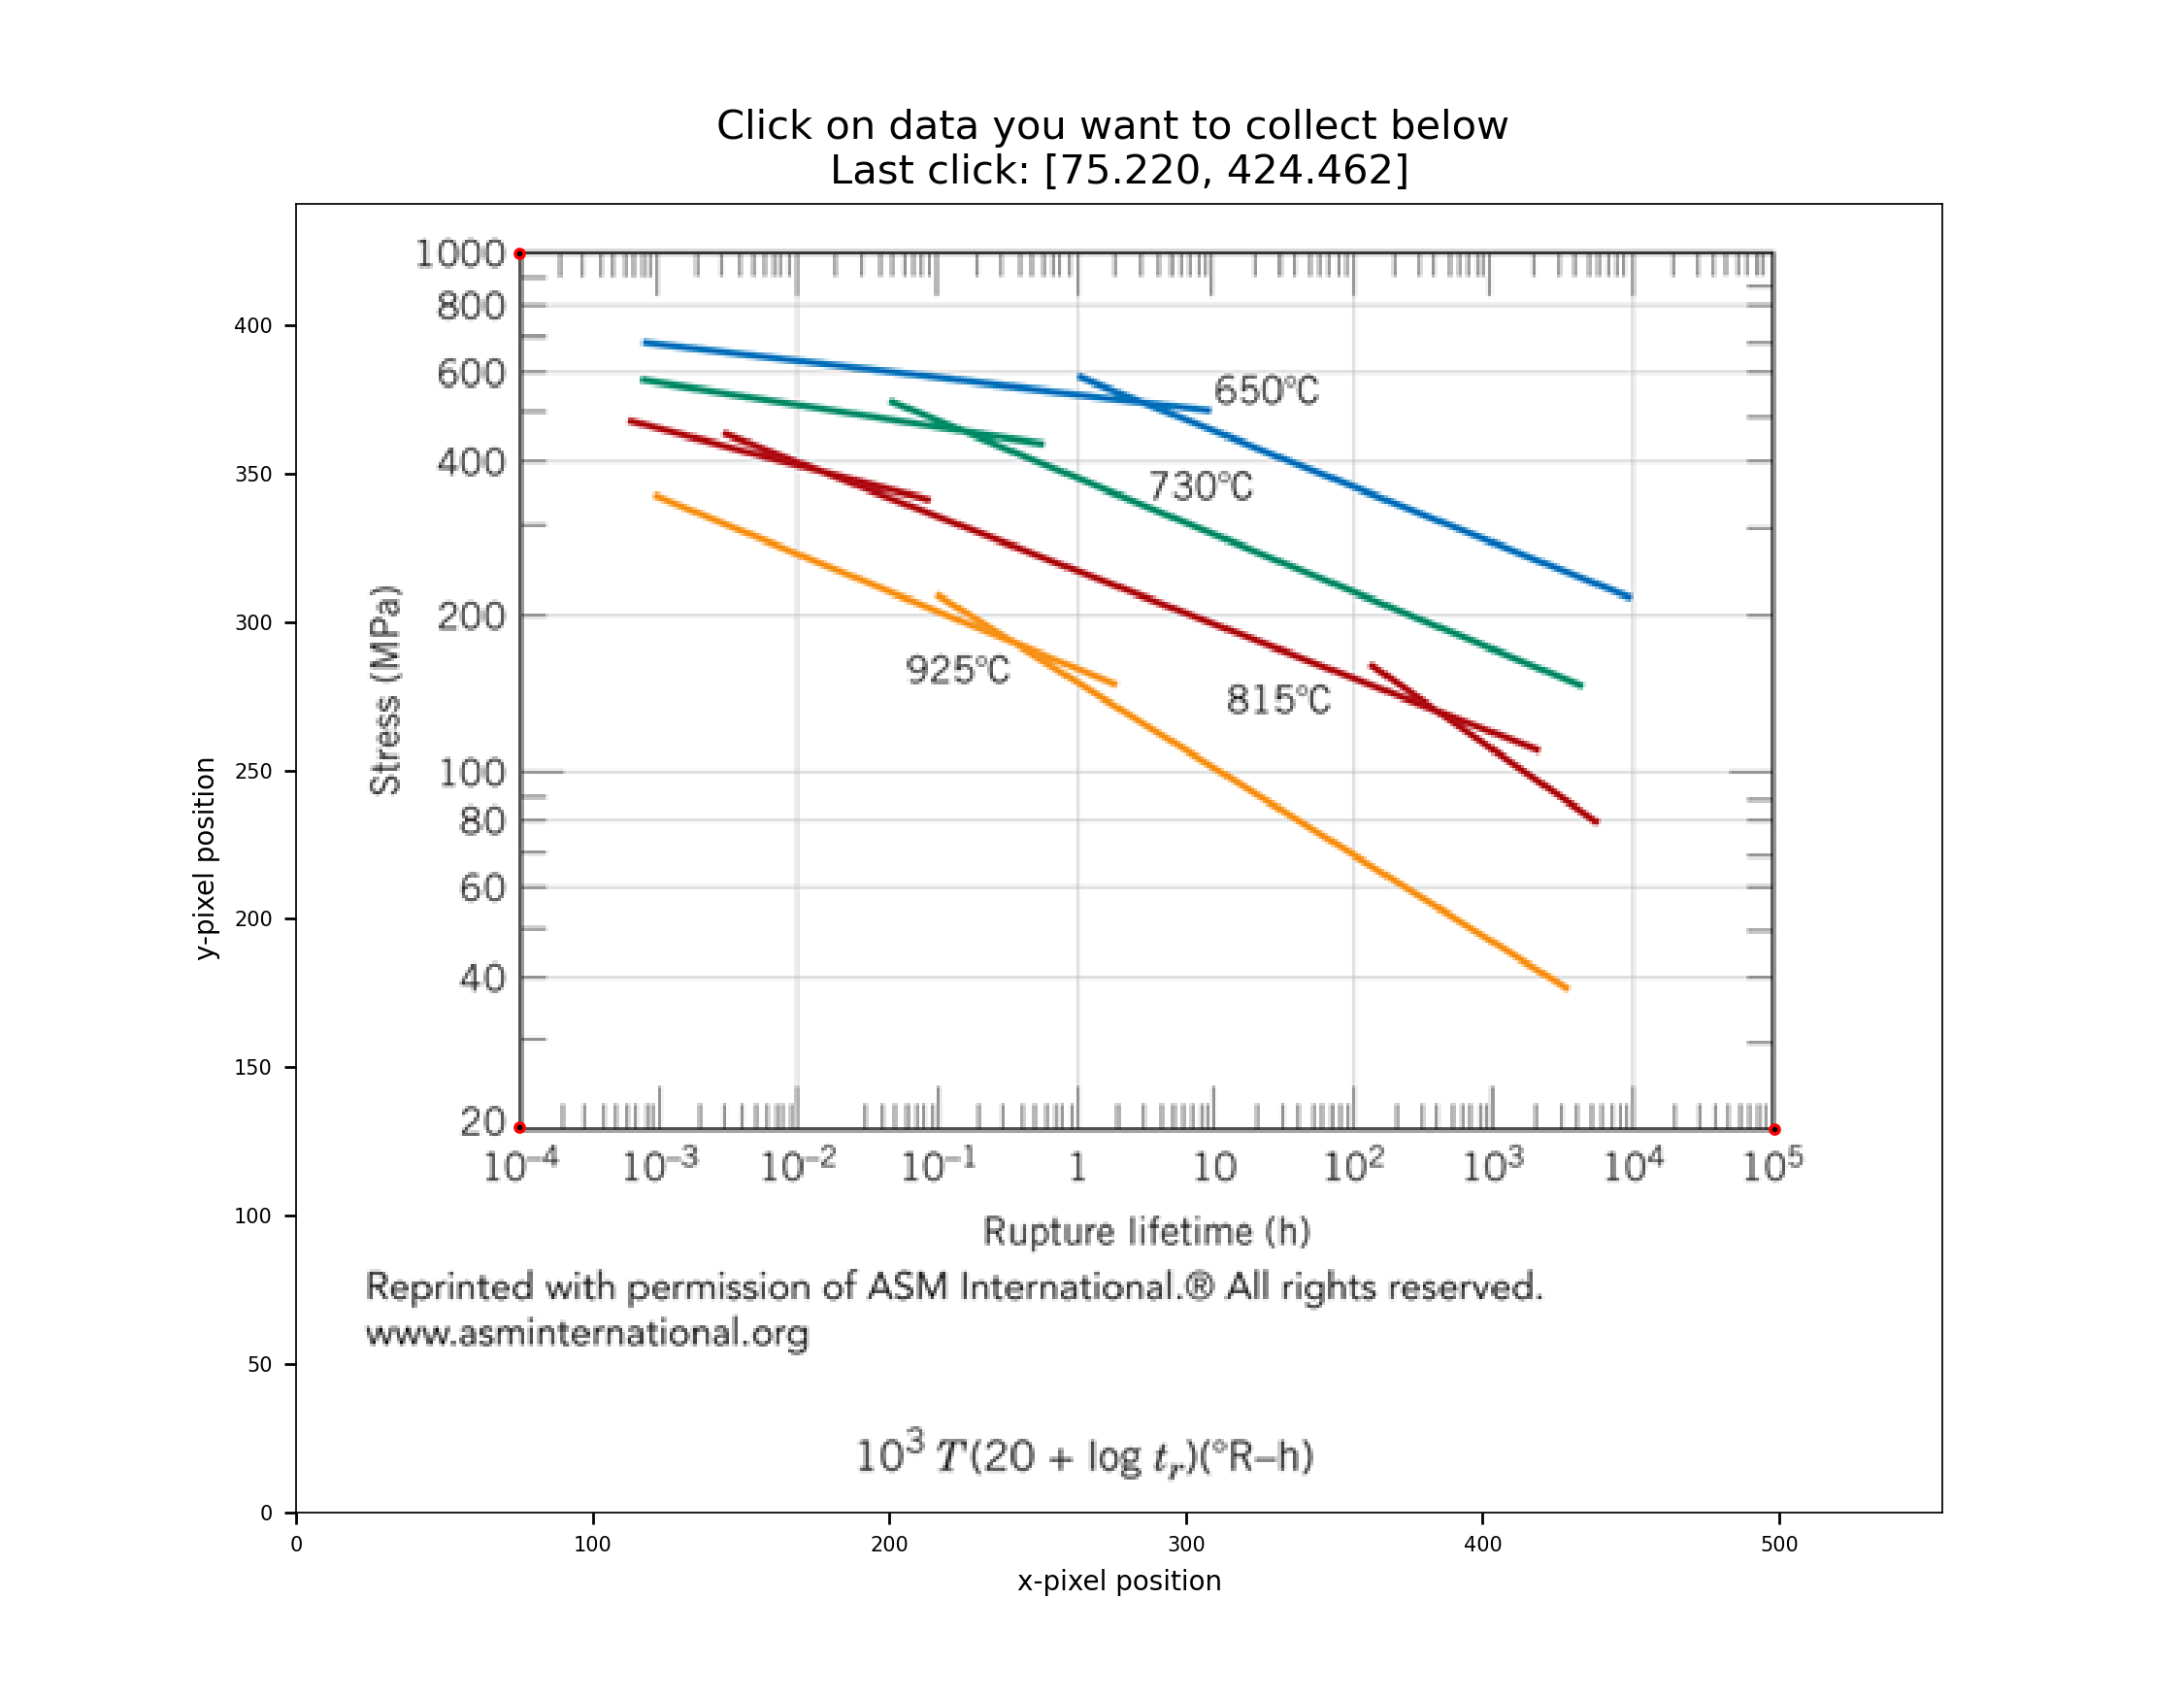

In [2]:
path=r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\lessons_3114\Week 9"
filename='stress rupture from callister.png'
fullpath= os.path.join(path, filename)
img = mpimg.imread(fullpath) #matplotlib

# if getting error about object not appearing to be 8-bit string path then use
# selectdata(str(fullpath))
selectdata(fullpath)

In [3]:
# execute to close plot interaction above
%matplotlib inline
pixel_positions

[[498.21988886052907, 129.09886238791725],
 [75.21988886052911, 129.91704420609906],
 [75.21988886052911, 424.4624987515536]]

Running the above selectdata() function 5 times, I collected the following data: (Note I only selected the two end pts and any intersection points along each curve above since these were defined by straight lines.) **Also** we want the log of the data for our calibration since the axes are log and are cal() function is linear.  

In [4]:
pxpts=[[498.21988886052907, 129.09886238791725],
 [75.21988886052911, 129.91704420609906],
 [75.21988886052911, 424.4624987515536]]

logplotpts=[[5, np.log10(20)],[-4, np.log10(20)],[-4, 3]]  #Remember you need the log of the data since we have a log scale

d650C= [[448.01018702730215, 310.9906934914014],
 [282.691038091132, 376.593530370834],
 [114.74777567978445, 397.58643817225243]]
d730C=[[430.95344943864967, 282.12544526445106],
 [223.64848489964263, 367.40913320771347],
 [114.74777567978445, 384.46587079636595]]
d815C=[[436.2016763890043, 234.89140271125956],
 [382.4073501478696, 274.2531048389191],
 [172.47827213368515, 355.6006225694156],
 [110.8116054670185, 371.3453034204794]]
d925C=[[425.7052224882951, 178.47296299494747],
 [236.76905227552913, 297.8701261155149],
 [119.99600263013907, 345.10416866870634]]

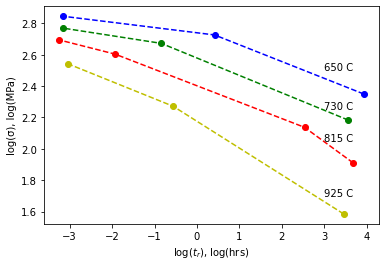

In [5]:
%matplotlib inline
cal650C=cal(pxpts, logplotpts, d650C)
cal730C=cal(pxpts, logplotpts, d730C)
cal815C=cal(pxpts, logplotpts, d815C)
cal925C=cal(pxpts, logplotpts, d925C)

plt.plot(cal650C[:,0], cal650C[:,1], 'b--', marker='o')
plt.plot(cal730C[:,0], cal730C[:,1], 'g--', marker='o')
plt.plot(cal815C[:,0], cal815C[:,1], 'r--', marker='o')
plt.plot(cal925C[:,0], cal925C[:,1], 'y--', marker='o')
plt.text(3, 2.5,'650 C')
plt.text(3, 2.25,'730 C')
plt.text(3, 2.05,'815 C')
plt.text(3, 1.7,'925 C')
plt.xlabel('log($t_r$), log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.show()

## According to our textbook this data will collapse if C = 20

Now we want to plot log stress vs T*(20+log($t_r$))  which is known as the Larsen-Miller parameter, LM.  $T$ here is the temperature in Kelvin, $t_r$ is the rupture time. 

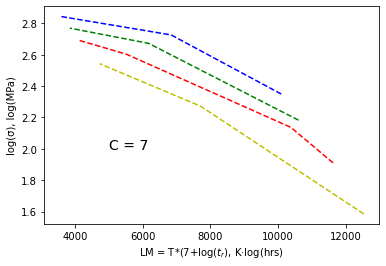

In [36]:
c_value=7

lm650C=(650+273)*(c_value+cal650C[:,0]) #calculating LM for each temperature and a C = 20
lm730C=(730+273)*(c_value+cal730C[:,0])
lm815C=(815+273)*(c_value+cal815C[:,0])
lm925C=(925+273)*(c_value+cal925C[:,0])

plt.plot(lm650C, cal650C[:,1], 'b--')
plt.plot(lm730C, cal730C[:,1], 'g--')
plt.plot(lm815C, cal815C[:,1], 'r--')
plt.plot(lm925C, cal925C[:,1], 'y--')
plt.xlabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.text(5000, 2, f"C = {c_value}", fontsize=14)
plt.show()

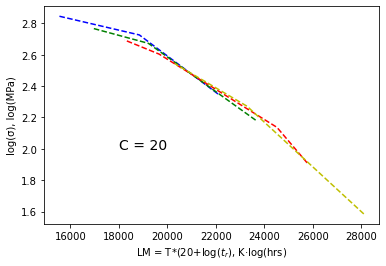

In [39]:
c_value=20

lm650C=(650+273)*(c_value+cal650C[:,0]) #calculating LM for each temperature and a C = 20
lm730C=(730+273)*(c_value+cal730C[:,0])
lm815C=(815+273)*(c_value+cal815C[:,0])
lm925C=(925+273)*(c_value+cal925C[:,0])

plt.plot(lm650C, cal650C[:,1], 'b--')
plt.plot(lm730C, cal730C[:,1], 'g--')
plt.plot(lm815C, cal815C[:,1], 'r--')
plt.plot(lm925C, cal925C[:,1], 'y--')
plt.xlabel('LM = T*(20+log($t_r$), K·log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.text(18000, 2, f"C = {c_value}", fontsize=14)
plt.show()

and magically our data collapses to one curve.  Rather than using the plot above to read off the LM value (x-axis) for a specific stress value (y-axis), we will just fit the data to a polynomial function, $$LM = a0+a1 \ log(\sigma)+a2\ log(\sigma)^2+a3\ log(\sigma)^3 +...$$  so $log(\sigma)$ is our independent variable.  Let's replot: 

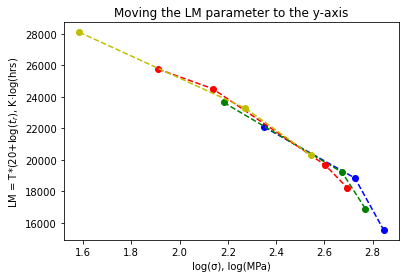

In [40]:
# x-data is cal650C[:,1],cal730C[:,1],cal815C[:,1],cal925C[:,1]
# y-data is lm650C, lm730C, lm815C, lm925C, respectively

plt.plot(cal650C[:,1],lm650C,  'b--', marker='o')
plt.plot(cal730C[:,1],lm730C,  'g--', marker='o')
plt.plot(cal815C[:,1],lm815C,  'r--', marker='o')
plt.plot(cal925C[:,1],lm925C,  'y--', marker='o')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.title('Moving the LM parameter to the y-axis')

plt.show()

Let's combine our data sets so we can fit them.  We also want the final dataset to be sorted by the x-values. 

In [41]:
# two methods to combine the data
# option 1: use np.append
#x=np.append(np.append(np.append(cal650C[:,1],cal730C[:,1]),cal815C[:,1]),cal925C[:,1])
#y=np.append(np.append(np.append(lm650C, lm730C),lm815C),lm925C)

# option 2: use np.hstack
x=np.hstack((cal650C[:,1], cal730C[:,1], cal815C[:,1], cal925C[:,1]))
y=np.hstack((lm650C, lm730C, lm815C, lm925C))

# now let's put data together as (x,y) pairs so we can sort by x values
xypairs=np.array(list(zip(x,y)))  #put all our data together as x,y pairs
xysorted=xypairs[xypairs[:,0].argsort()] #sort our data according to the x value, argsort() returns indices of sorted array

# separate data back to 1D lists for x-values and y-values
logσ=xysorted[:,0]
lmparam=xysorted[:,1]

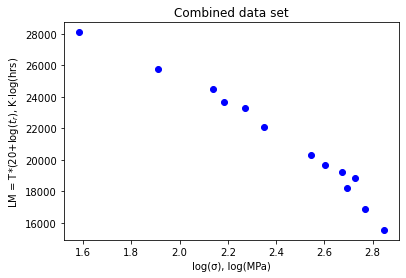

In [42]:
# check our combined dataset

plt.plot(logσ,lmparam,  'bo')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.title('Combined data set')

plt.show()

## Fit the above data to a polynomial

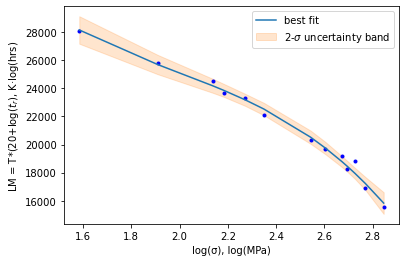

Best Values: {'a0': 82394.01217068503, 'a1': -73688.05838766707, 'a2': 33978.07537229554, 'a3': -5729.188956922097}


In [46]:
from lmfit import models, Model, Parameters

# define our polynomial fit
def poly(x, a0, a1, a2, a3):
    return(a0+a1*x+a2*x**2+a3*x**3)

model = Model(poly) 

# print(f'parameter names: {model.param_names}')
# print(f'independent variables: {model.independent_vars}')

# now we help the fitting process by giving starting values and bounds on our parameters
params = Parameters()
# parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('a0', 1, True, None, None, None, None),
                ('a1', 1, True, None, None, None, None),
                ('a2', 1, True, None, None, None, None),
                ('a3', 1, True, None, None, None, None))

# our x and y data
xdata=logσ
ydata=lmparam

result = model.fit(ydata, params, x=xdata) #now we perform the fit to our x & y data with the given params
dely = result.eval_uncertainty(x=xdata, sigma=2) #uncertainty

# only need below if you have more than one model added together (see week 8 lesson)
#comps = result.eval_components() 

plt.plot(xdata, ydata, 'b.') #our x,y data blue dots
#plt.plot(xdata, result.init_fit, '--', label='initial fit')
plt.plot(xdata, result.best_fit, '-', label='best fit')
plt.fill_between(xdata, result.best_fit-dely, result.best_fit+dely,color='C1', alpha=0.2,
                 label='2-$\sigma$ uncertainty band')
plt.legend(loc='best')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.show()

# print(result.fit_report())
print(f'Best Values: {result.best_values}')

**Example Problem for Rupture Lifetime using our polynomial fit from above:**

>What is the rupture lifetime at 775 C under a stress load of 355 MPa?  
We just need to calculate the LM parameter from our polynomial fit and set that equal to T*(20+log($t_r$)) and solve for the rupture time.  

In [44]:
result.best_values.values()

dict_values([82394.01217068503, -73688.05838766707, 33978.07537229554, -5729.188956922097])

In [45]:
poly(np.log10(355),*result.best_values.values()) # LM value at 355 MPa

20431.290100041675

20431.3 = (775+273)*(20+log($t_r$))  

therefore the log($t_r$) = 20431.3 /  (775+273) - 20 = -0.50448  

or $t_r$ = $10^{-0.50448}$ = 0.31 hours

<hr style='height:4px' \>

## Where did the Callister textbook get this C=20 value?  Let's see if we can find a way to fit our data to determine C.  

First, let's look at a few C values around the value of 20 and see what the data looks like.  You can see below the goodness of fit to a polynomial for various C values.  The routine below will vary this C parameter until the optimal fit is achieved.  In this case it looks like a C of 20.789 is best.  
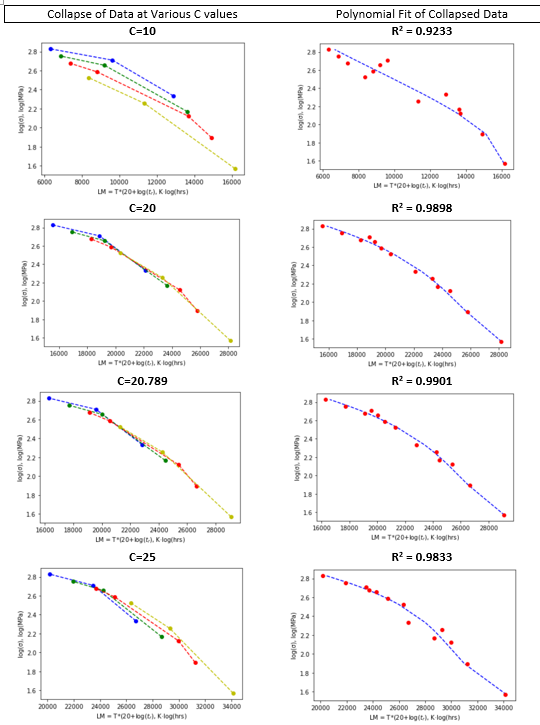

In [47]:
from lmfit import models, Model, Parameters, minimize
from scipy.optimize import curve_fit
from scipy import optimize

def poly(x, a0, a1, a2, a3):
    return(a0+a1*x+a2*x**2+a3*x**3)

def cost(c, cal650C, cal730C, cal815C, cal925C):
    
    def poly(x, a0, a1, a2, a3):
        return(a0+a1*x+a2*x**2+a3*x**3)

    global popt, logσ, lmparam, result, fit_vals
    
    lm650C=(650+273)*(c+cal650C[:,0])
    lm730C=(730+273)*(c+cal730C[:,0])
    lm815C=(815+273)*(c+cal815C[:,0])
    lm925C=(925+273)*(c+cal925C[:,0])
    
    #appending all our data together
    x=np.append(np.append(np.append(cal650C[:,1],cal730C[:,1]),cal815C[:,1]),cal925C[:,1])
    y=np.append(np.append(np.append(lm650C, lm730C),lm815C),lm925C)
    #placing our data as x,y pairs using the function zip
    #then sorting so the x values are in order 
    temp=np.array(list(zip(x,y)))  #put all our data together as x,y pairs
    temp=temp[temp[:,0].argsort()] #sort our data according to the x value
    
    #here's now the data we will fit
    logσ=temp[:,0] #the x data is actually the log of stress
    lmparam=temp[:,1] #the y data is the larsen miller value calculated above
    
    ###########
    model = Model(poly) 

    params = Parameters()
    # parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
    params.add_many(('a0', 1, True, None, None, None, None),
                    ('a1', 1, True, None, None, None, None),
                    ('a2', 1, True, None, None, None, None),
                    ('a3', 1, True, None, None, None, None))

    result = model.fit(lmparam, params, x=logσ) #now we perform the fit to our x & y data with the given params
    fit_vals = result.best_values.values()
    residuals = lmparam - poly(logσ, *fit_vals) #calculate the difference between the fit and the data
    ss_res = np.sum(residuals**2) #calculate the sum of the squares
    ss_tot = np.sum((lmparam-np.mean(lmparam))**2) #calculate the sum of the squares relative to the mean value
    r_squared = 1 - (ss_res / ss_tot) # now find the Rsquared value for the fit
   
    return 1-r_squared #return 1-Rsquared - this is what should be minimized on a good fit

out = optimize.minimize(cost, 1.0, args=(cal650C, cal730C, cal815C, cal925C))

print(f'C: {out.x[0]:3.3f}')
print(result.fit_report())


C: 20.788
[[Model]]
    Model(poly)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 13
    # variables        = 4
    chi-square         = 1636184.15
    reduced chi-square = 181798.239
    Akaike info crit   = 160.658064
    Bayesian info crit = 162.917861
[[Variables]]
    a0:  90544.4726 +/- 29440.3765 (32.51%) (init = 1)
    a1: -83840.0363 +/- 41407.0091 (49.39%) (init = 1)
    a2:  38634.2647 +/- 19030.8437 (49.26%) (init = 1)
    a3: -6433.98716 +/- 2863.49243 (44.51%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a3) = -0.999
    C(a1, a2) = -0.999
    C(a0, a1) = -0.998
    C(a1, a3) = 0.995
    C(a0, a2) = 0.994
    C(a0, a3) = -0.989


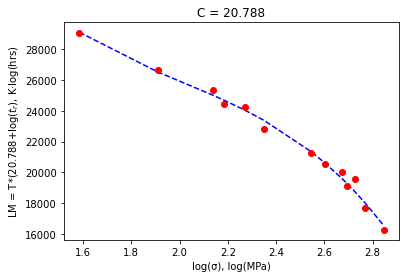

In [48]:
plt.plot(logσ, func(logσ, *fit_vals), 'b--')
plt.plot(logσ, lmparam, 'ro');
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({out.x[0]:3.3f}+log($t_r$), K·log(hrs)')
plt.title(f'C = {out.x[0]:3.3f}')
plt.show()

You can see that we got a C value of 20.788 which is better than the value of 20 used by the textbook - although the difference is minor.  

Let's look at that example problem again: 

>What is the rupture lifetime at 775 C under a stress load of 355 MPa?  
We just need to calculate the LM parameter from our polynomial fit and set that equal to T*(20.789+log($t_r$)) and solve for the rupture time. 

In [49]:
fit_vals

dict_values([90544.47262043494, -83840.0363021492, 38634.264671202036, -6433.987158936594])

In [50]:
poly(np.log10(355),*fit_vals)

21284.51923218921

21284.5 = (775+273)*(20.788+log($t_r$))  

therefore the log($t_r$) = 21284.5 /  (775+273) - 20.788 = -0.47836  

or $t_r$ = $10^{-0.47836}$ = 0.33 hours (only about 1 minute different from our last answer )

## Your turn :)

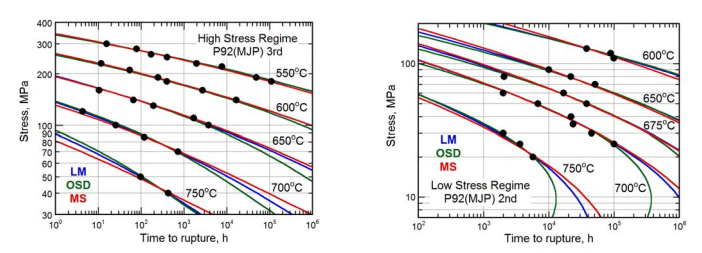

#### To do:   

1. Pick either the High Stress Regime (fig a) or the Low Stress Regime (fig b) or you can do both!  Use selectdata() and cal() to grab all of the data points on the figure you chose and replot the figure.  Remember to be careful with the log axes when you find plotpts.  Each set of points should be in a different color. Like this: 
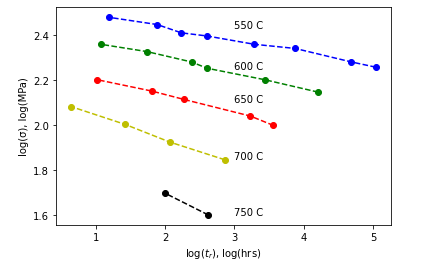

2. Collapse all your data to one curve on a Larsen-Miller plot by finding the factor "C".  This is not trial and error.  Use a fitting routine to find "C" as developed in the lesson.  My data collapsed as shown:  

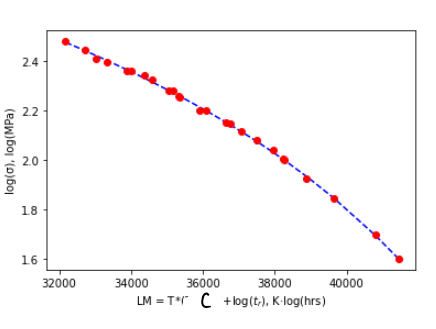

3. Print the value of C and also print the final values of the polynomial for the fit shown above.        